## CART---- classification and regression tree
> **根据某一个维度和某一个阈值v进行二分**

> **scikit-learn的决策树实现：cart.但是还有其他方法 id3、c4.5...**

> **训练的复杂度非常高， 同时容易产生过拟合的情况，需要对模型进行剪枝(最大深度...)**

<img src='./picture/5-1.png'>
<img src='./picture/5-2.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) *100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) *100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)



In [2]:
X, y = datasets.make_moons(noise=0.25, random_state=666)

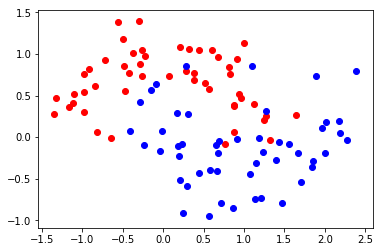

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

## 默认参数的决策树（不指定最大深度）
> **使用基尼系数法，直到每个基尼系数都为0**

In [5]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


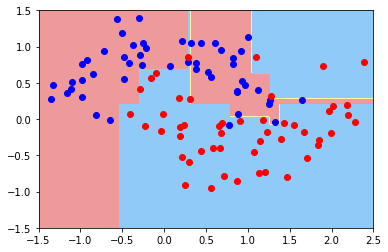

In [6]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

## 超参数---最大深度

In [17]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


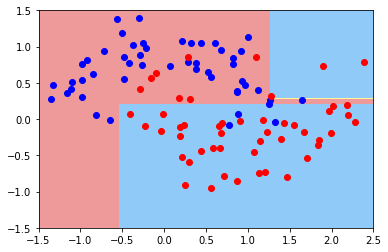

In [16]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

## 超参数---叶子节点上最小的划分样本数量

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


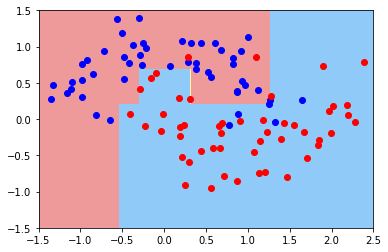

In [10]:
dt_clf = DecisionTreeClassifier(min_samples_split=10)
dt_clf.fit(X, y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

## 超参数--- 对于叶子节点来说最小节点

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


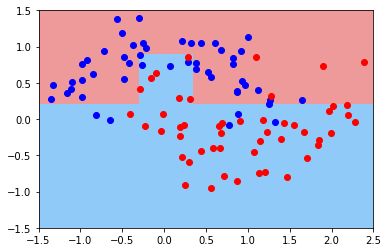

In [11]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf.fit(X, y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()

## 超参数--- 最多的叶子节点

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


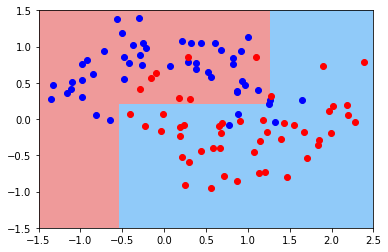

In [14]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes = 4)
dt_clf.fit(X, y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.5, 1.5])
plt.scatter(X[y==0,0], X[y==0,1], color='b')
plt.scatter(X[y==1,0], X[y==1,1], color='r')
plt.show()